In [1]:
#define

import numpy as np

class Bandit:
    def __init__(self,arms=10):
        #np.random.seed(seed=512) #seed値を設定している
        self.rates = np.random.rand(arms) #各マシンの確率
        #self.rates = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,1.0]
        self.rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
        #self.rates = [0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
        self.rates[arms-1] = 1.0 # 最後のマシンのみ確率を設定
        #print(self.rates, self.rates[arms-1])

    def play(self,arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

class Agent:
    def __init__(self,epsilon,action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
    
    def update(self,action,reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        #if np.random.rand() < self.epsilon:
        #    return np.random.randint(0,len(self.Qs))
        #else:
        #  if np.all(self.Qs == 0):
        #    return np.random.randint(0,len(self.Qs))
        #  else:
        #    return np.argmax(self.Qs)
        if np.random.rand() < self.epsilon:
            return np.random.randint(0,len(self.Qs))
        return np.argmax(self.Qs)

steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
steps= 1000
step

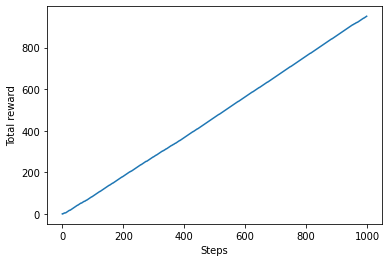

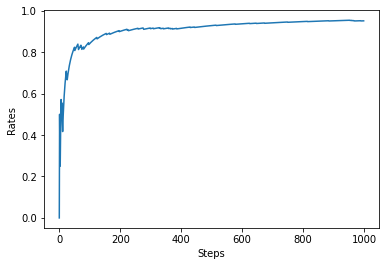

In [ ]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action() #１:行動を選ぶ
    reward = bandit.play(action) #2:実際にプレイして報酬を得る
    agent.update(action,reward) #3:行動と報酬から学ぶ
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

#グラフ描画(1)
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

#グラフ描画(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

average_rates 0.9547125999999996


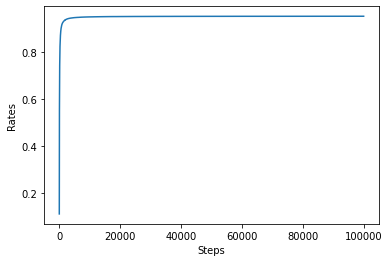

In [2]:
#改良後
import matplotlib.pyplot as plt
import numpy as np

runs = 100
steps = 100000
epsilon = 0.1
all_rates = np.zeros( (runs,steps) ) #(200,1000)の行列

for run in range(runs):
  #print("runs=" , run)
  bandit = Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  rates = []

  for step in range(steps):
    action = agent.get_action() #１:行動を選ぶ
    reward = bandit.play(action) #2:実際にプレイして報酬を得る
    agent.update(action,reward) #3:行動と報酬から学ぶ
    total_reward += reward
    rates.append(total_reward / (step + 1))
  all_rates[run] = rates #1報酬結果を記録
avg_rates = np.average(all_rates, axis=0) #2各ステップにおける報酬平均

#グラフ描画(1)
print("average_rates", avg_rates[steps-1])
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

In [ ]:
"""
非定常問題 P30
"""

In [ ]:
class NonStatBandit:
  def __init__(self,arms=10):
    self.arms = arms
    self.rates = np.random.rand(arms) #各マシンの確率
  
  def play(self,arm):
    rate = self.rates[arm]
    self.rates += 0.1 * np.random.randn(self.arms) #ノイズ追加
    if rate > np.random.rand():
        return 1
    else:
        return 0

In [ ]:
class AlphaAgent:
  def __init__(self,epsilon,alpha,actions=10):
    self.epsilon = epsilon
    self.Qs = np.zeros(actions)
    self.alpha = alpha

  def update(self,action,reward):
    #alphaで更新
    self.Qs[action] += (reward - self.Qs[action]) * self.alpha

  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0,len(self.Qs))
    return np.argmax(self.Qs)

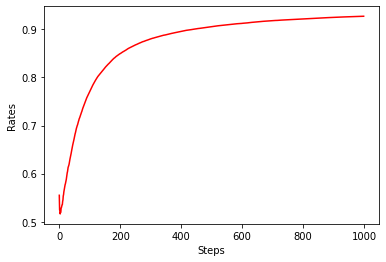

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
all_rates = np.zeros((runs,steps)) #(200,1000)の行列

for run in range(runs):
  bandit = NonStatBandit()
  agent = AlphaAgent(epsilon,alpha)
  total_reward = 0
  rates = []

  for step in range(steps):
    action = agent.get_action() #１:行動を選ぶ
    reward = bandit.play(action) #2:実際にプレイして報酬を得る
    agent.update(action,reward) #3:行動と報酬から学ぶ
    total_reward += reward
    rates.append(total_reward / (step + 1))

  all_rates[run] = rates #1報酬結果を記録
      

avg_rates = np.average(all_rates,axis=0) #2各ステップにおける報酬平均

#グラフ描画(1)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates,color='r')
plt.show()